In [1]:
%matplotlib inline

# Calman Filter
## Question 4
$$x_{k+1} = e^{j\theta_k}x_k,\enspace x_0 = x = [1, 0]$$
$$y_k = x_k + v_k, \enspace \mathbb{E}\{v_k^2\} = 0.01$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.family':'Times New Roman',
    'text.usetex': True
})
csfont = {'fontname':'Times New Roman'}
from kf import KF, Luenberger, mean_prior
rng = np.random.default_rng()
pi = np.pi

In [3]:
x0 = np.array([0.5, 0.5])
Ps = np.array([[2, 0], [0, 0.16]])
Qs = np.array([[4.9502e-7, 0], [0, 9.8510e-5]])
Qs = np.array([[4.9502e-6, 0], [0, 9.8510e-4]])
# Qs = np.array([[4.9502e-5, 0], [0, 9.8510e-3]])
Qs = np.power(Qs, 2)
# Qs = np.zeros((2,2))
PHIs = np.array([[np.cos(pi/180),-np.sin(pi/180)], [np.sin(pi/180),np.cos(pi/180)]])
GAMMAs = np.eye(2)
UPSILONs = np.eye(2)
Hs = np.array([[1, 1]])
kf = KF(x0=x0, P0=Ps, H=Hs, Q=Qs, R=[0.01], PHI=PHIs, GAMMA=GAMMAs, UPSILON=UPSILONs)
mean_prior(kf, [1, 0], 1000)

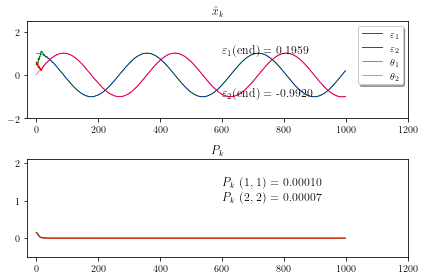

In [4]:
plt.figure()
plt.subplot(2, 1, 1)
plt.title(r"$\hat{x}_k$")
plt.plot([mean[0] for mean in kf.x_hat], 'g', linewidth=1, label=r'$\varepsilon_1$')
plt.plot([mean[1] for mean in kf.x_hat], 'r', linewidth=1, label=r'$\varepsilon_2$')
plt.plot([mean[0] for mean in kf.mean], 'b', linewidth=0.5, label=r'$\theta_1$')
plt.plot([mean[1] for mean in kf.mean], 'm', linewidth=0.5, label=r'$\theta_2$')
leg = plt.legend(loc='upper right', ncol=1, shadow=True, fancybox=True)
plt.text(600, 1, r'$\varepsilon_1$(end) = ' + f"{kf.x_hat[-1][0]:.4f}", fontsize=12)
plt.text(600, -1, r'$\varepsilon_2$(end) = ' + f"{kf.x_hat[-1][1]:.4f}", fontsize=12)
plt.ylim([-2, 2.5])
plt.xlim([-30, 1200])

plt.subplot(2, 1, 2)
plt.title(r"$P_k$")
plt.plot([cov[0][0] for cov in kf.P], 'g', linewidth=1)
plt.plot([cov[1][1] for cov in kf.P], 'r', linewidth=1)
plt.text(600, 1.4, r'$P_k$ (1, 1) = ' + f"{kf.P[-1][0][0]:.5f}", fontsize=12)
plt.text(600, 1, r'$P_k$ (2, 2) = ' + f"{kf.P[-1][1][1]:.5f}", fontsize=12)
plt.ylim([-0.5, 2.1])
plt.xlim([-30, 1200])

fig = plt.gcf()
plt.tight_layout()
fig.savefig('img/answer40'+'.png', dpi=600)
plt.show()

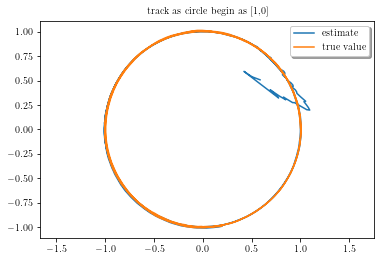

In [5]:
fig, ax = plt.subplots()
x_hat = [mean[0] for mean in kf.x_hat]
y_hat = [mean[1] for mean in kf.x_hat]
x = [mean[0] for mean in kf.mean]
y = [mean[1] for mean in kf.mean]

ax.plot(x_hat, y_hat, label = 'estimate')
ax.plot(x, y, label = 'true value')
ax.set_title('track as circle begin as [1,0]', fontsize=10)
ax.axis('equal')
leg = plt.legend(loc='upper right', ncol=1, shadow=True, fancybox=True)
# ax.set_aspect('equal', 'box')
# fig.tight_layout()
fig.savefig('img/answer41'+'.png', dpi=600)
plt.show()

In [6]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Plot circle of radius 3.

# an = np.linspace(0, 2 * np.pi, 100)
# fig, axs = plt.subplots(2, 2)

# axs[0, 0].plot(3 * np.cos(an), 3 * np.sin(an))
# axs[0, 0].set_title('not equal, looks like ellipse', fontsize=10)

# axs[0, 1].plot(3 * np.cos(an), 3 * np.sin(an))
# axs[0, 1].axis('equal')
# axs[0, 1].set_title('equal, looks like circle', fontsize=10)

# axs[1, 0].plot(3 * np.cos(an), 3 * np.sin(an))
# axs[1, 0].axis('equal')
# axs[1, 0].set(xlim=(-3, 3), ylim=(-3, 3))
# axs[1, 0].set_title('still a circle, even after changing limits', fontsize=10)

# axs[1, 1].plot(3 * np.cos(an), 3 * np.sin(an))
# axs[1, 1].set_aspect('equal', 'box')
# axs[1, 1].set_title('still a circle, auto-adjusted data limits', fontsize=10)

# fig.tight_layout()

# plt.show()

In [7]:
# np.linspace(0, 2 * np.pi, 10, endpoint=False)

In [8]:
Qs

array([[2.4504480e-11, 0.0000000e+00],
       [0.0000000e+00, 9.7042201e-07]])